In [1]:
import os
import json
import numpy as np
import torch
import result
import pandas as pd
from rnn_model import LSTMNet, GRUNet
from utils import DotDict, Logger, rmse, rmse_tensor, rmse_np, boolean_string, get_dir, get_time, next_dir, model_dir, get_model
from get_dataset import get_time_data, get_stnn_data
from stnn import *
import matplotlib.pyplot as plt
from matplotlib import axis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


# pred 3 time step

## Jar

In [4]:
datadir = 'data'
dataset = 'jar'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

jar_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'jar_3'))
jar_result = result.Printer(jar_folder)
pd.options.display.max_rows = None
# a = jar_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
jar_df = jar_result.get_df(col=['sum_loss', 'minsum', 'minrmse', 'activation'], increase=False).sort_values('sum_loss')
jar_df.loc[jar_df['used_model'] != 'keras']

,sum_loss,minsum,minrmse,activation,used_model
v2-stnn_05-10-15-36-14_2613,28.6778,10168.7,597.525,tanh,v2
v1-stnn_05-10-15-34-49_5038,65.1235,13416.9,756.897,relu,v1
v1-stnn_05-10-15-34-49_9473,67.9589,13363,768.106,relu,v1
v2-stnn_05-10-15-36-14_2635,83.2363,12632.5,720.1,relu,v2
v1-stnn_05-10-15-34-49_0875,86.5802,11436.2,645.905,sigmoid,v1
v1-stnn_05-10-15-34-49_7132,100.189,12678,704.747,relu,v1
v1-stnn_05-10-15-34-49_0298,116.179,9061.78,500.746,sigmoid,v1
v2-stnn_05-10-15-36-14_9669,116.864,13411.7,759.925,relu,v2
v2-stnn_05-10-15-36-14_3358,117.172,12595,700.324,relu,v2
v1-stnn_05-10-15-34-48_1607,141.317,10249.2,593.178,tanh,v1


14216.894152613902


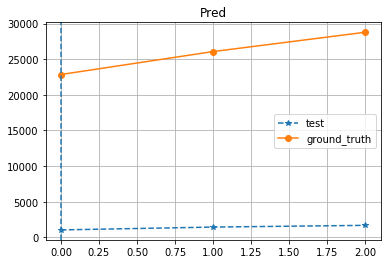

14216.894152613902


In [19]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/jar_3'
exp_name = 'v2-stnn_05-10-15-36-14_2613'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
# print(exp.config['minepoch'])
# print(exp.config['manualSeed'])
# print(exp.pred_loss())
result.plot_pred_by_dir(exp_dir, path, train=False, increase=False)
print(exp.pred_loss())

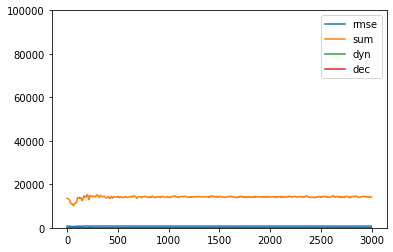

In [20]:
exp.draw_loss()

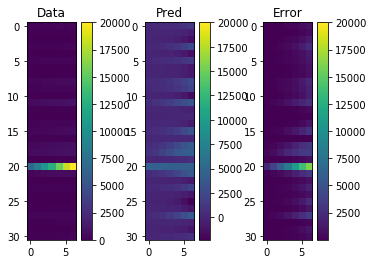

In [11]:
exp.plot_distribution()

## Feb

In [13]:
datadir = 'data'
dataset = 'feb'
data, _ = get_time_data(datadir, dataset)
data = data.numpy()

# plt.figure('ncov Dataset')
# plt.imshow(data[:, :, 0].T, aspect='auto', cmap='jet')
# plt.title('ncov Dataset')
# plt.xlabel('timestep')
# plt.colorbar()

feb_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output_result', 'feb'))
feb_result = result.Printer(feb_folder)
pd.options.display.max_rows = None
# a = feb_result.get_df(col=['train_loss', 'test_loss', 'mode']).sort_values('test_loss', ascending=True)
feb_df = feb_result.get_df(col=['sum_loss', 'true_loss', 'nlayers', 'test_loss', 'nt_train', 'activation'], increase=False).sort_values('true_loss')
feb_df.loc[feb_df['used_model'] != 'keras']

,sum_loss,true_loss,nlayers,test_loss,nt_train,activation,used_model
v3-stnn_05-03-23-45-57_6570,281.599,27.3011,1,0.00425201,33,sigmoid,v3
v3-stnn_05-03-23-45-57_2952,1156.54,113.311,1,0.0176476,33,sigmoid,v3
v3-stnn_05-03-23-45-57_3731,1044.89,160.231,1,0.0249552,33,sigmoid,v3
ori-stnn_05-03-23-45-54_3515,3686.54,234.776,1,0.0365652,33,sigmoid,ori
v3-stnn_05-03-23-45-57_7590,4781.07,247.337,1,0.0385215,33,sigmoid,v3
v3-stnn_05-05-19-06-00_1485,2230.78,264.783,3,0.0402855,29,relu,v3
ori-stnn_05-03-23-45-54_2169,3780.74,309.565,1,0.0482133,33,sigmoid,ori
v3-stnn_05-05-19-07-12_7644,2334.31,319.139,3,0.0485556,29,relu,v3
v3-stnn_05-05-19-07-12_2055,2239.67,329.8,3,0.0501776,29,relu,v3
v3-stnn_05-05-19-05-59_0553,4015.88,335.527,3,0.0510489,29,relu,v3


9995
281.5994371670056
281.5994371670056


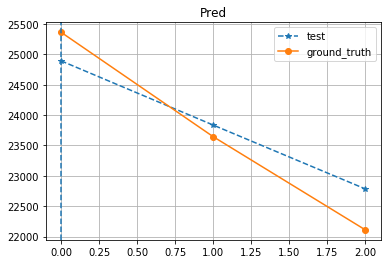

({'test': array([24893.02453613, 23835.34179688, 22783.72558594])},
 array([25364., 23644., 22109.]))

In [19]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output_result/feb'
exp_name = 'v3-stnn_05-03-23-45-57_6570'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
# print(exp.config['mintest'])
# print(exp.config['minepoch'])
print(exp.config['manualSeed'])
print(exp.pred_loss())
result.plot_pred_by_dir(exp_dir, path, train=False, increase=False)

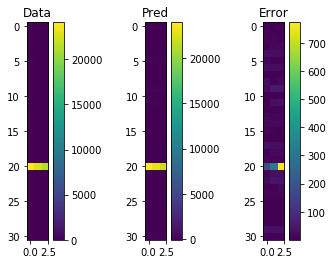

In [21]:
exp.plot_distribution()

({'v3': array([39917.68518066, 44202.38565063, 48369.59259033, 52924.11895752,
         57578.46289062, 62220.36761475, 66760.41015625]),
  'ori': array([46482.22677612, 45761.10635376, 45481.11273193, 45182.14282227,
         44980.92962646, 44854.08123779, 44775.4112854 ]),
  'v1': array([11784.58117676, 18463.44393921, 20288.84906006, 22882.7628479 ,
         28680.95269775, 31882.33145142, 33286.84310913])},
 array([34847., 32327., 30007., 27349., 25364., 23644., 22109.]))

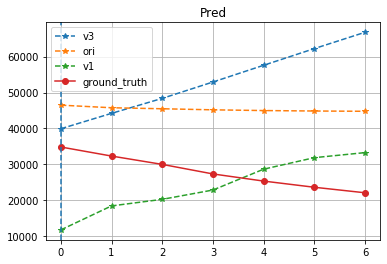

In [10]:
model_df = result.sorted_by_loss(feb_df, value='sum_loss')
exp_dir = result.get_exp_name(model_df)
exp_dir = {'v3': 'v3-stnn_05-03-23-45-57_0324','ori':'ori-stnn_05-03-23-45-54_1267',  'v1':'v1-stnn_05-03-23-44-22_7208'}
result.plot_pred_by_dir(exp_dir, feb_folder)

({'default': array([24424.27490234, 21926.83215332, 19660.66345215]),
  'refine': array([24893.02453613, 23835.34179688, 22783.72558594]),
  'discover': array([25128.18762207, 21730.42443848, 19224.38867188])},
 array([25364., 23644., 22109.]))

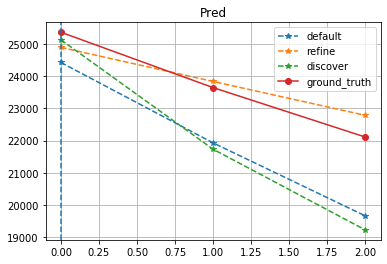

In [13]:
model_df = result.sorted_by_loss(feb_df, value='sum_loss')
exp_dir = result.get_exp_name(model_df)
exp_dir = {'default': 'v3-stnn_05-03-23-45-57_3731','refine':'v3-stnn_05-03-23-45-57_6570',  'discover':'v3-stnn_05-03-23-45-57_2952'}
result.plot_pred_by_dir(exp_dir, feb_folder)

## Test load data

{'test': array([26478.0838623 , 38150.56921387, 38160.15625   , 38451.74633789,
        38362.57519531, 38446.46191406, 38534.54309082, 38486.66955566,
        38719.29492188, 38742.23986816, 38827.6204834 , 38761.34057617,
        39246.19604492, 39311.32751465, 39367.20227051, 39200.99658203,
        39360.04931641, 39253.8190918 , 39442.98803711, 39137.48205566,
        38846.43603516, 38846.43603516, 38846.43603516, 38846.43603516,
        38846.43603516, 38846.43603516, 38846.43603516, 38846.43603516,
        38846.43603516, 38846.43603516, 38846.43603516, 38846.43603516,
        38846.43603516, 38846.43603516, 38846.43603516, 38846.43603516])}

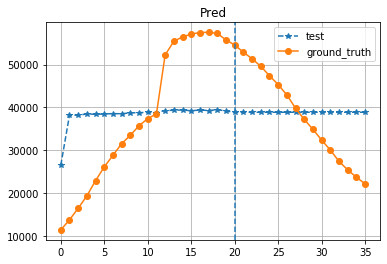

In [22]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/test'
exp_name = 'ori-stnn_05-03-17-01-14_3912'
# lambd =100
exp_dir = {'test': exp_name}
# exp_name = 'v2-stnn_05-03-00-05-59_0251'
# exp = Exp(exp_name, path)
# print(exp.plot_train_times().shape)
result.plot_pred_by_dir(exp_dir, path, train=True)

{'test': array([24648.40551758, 25389.57562256, 26711.04534912, 28398.07568359,
        30113.3036499 , 31639.97637939, 33060.71386719, 34311.49798584,
        35416.67614746, 36528.71166992, 37443.71893311, 37992.02026367,
        44903.79956055, 46387.79962158, 47090.1428833 , 47533.49536133,
        47604.55145264, 47657.74395752, 47953.83569336, 47216.18017578,
        50454.83569336, 44205.22192383, 40990.76098633, 39337.41821289,
        38491.07666016, 38104.24938965, 38004.57458496, 38005.79626465,
        38023.11096191, 38034.21936035, 38041.05773926, 38045.23742676,
        38047.78894043, 38049.34875488, 38050.3067627 , 38050.89746094])}

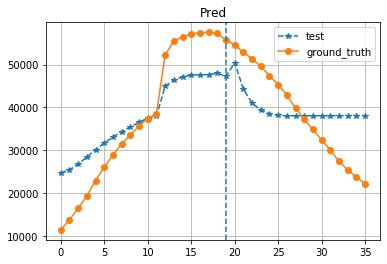

In [29]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/test'
exp_name = 'ori-stnn_05-03-16-40-00_6317'
exp_dir = {'test': exp_name}
# lambd=0.1
# exp_name = 'v2-stnn_05-03-00-05-59_0251'
# exp = Exp(exp_name, path)
# print(exp.plot_train_times().shape)
result.plot_pred_by_dir(exp_dir, path, train=True)

{'test': array([38149.02490234, 38240.74682617, 38240.74902344, 38240.74291992,
        38240.75793457, 38240.75476074, 38240.7253418 , 38240.75891113,
        38240.75805664, 38240.74450684, 38240.74707031, 38240.7701416 ,
        38240.71899414, 38240.76623535, 38240.7746582 , 38240.78759766,
        38240.76611328, 38240.74987793, 38240.76293945, 38240.75964355,
        38240.75915527, 38240.75915527, 38240.75915527, 38240.75915527,
        38240.75915527, 38240.75915527, 38240.75915527, 38240.75915527,
        38240.75915527, 38240.75915527, 38240.75915527, 38240.75915527,
        38240.75915527, 38240.75915527, 38240.75915527, 38240.75915527])}

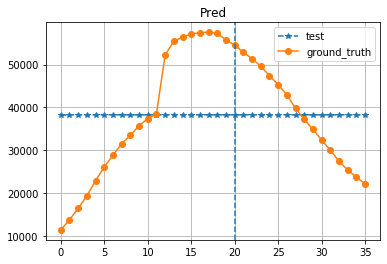

In [24]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/test'
exp_name = 'ori-stnn_05-03-17-03-31_9016'
exp_dir = {'test': exp_name}
# lambd=0.1
# exp_name = 'v2-stnn_05-03-00-05-59_0251'
# exp = Exp(exp_name, path)
# print(exp.plot_train_times().shape)
result.plot_pred_by_dir(exp_dir, path, train=True)

{'test': array([24720.16827393, 25897.2989502 , 27230.04510498, 28671.99932861,
        30434.50671387, 32021.37335205, 33426.24822998, 34758.26867676,
        35759.01416016, 36962.7520752 , 37749.01165771, 38391.45837402,
        45246.4453125 , 46836.5513916 , 47407.73162842, 47793.13867188,
        48096.42840576, 48257.84918213, 48199.42785645, 47593.60205078,
        38266.74133301, 38266.74133301, 38266.74133301, 38266.74133301,
        38266.74133301, 38266.74133301, 38266.74133301, 38266.74133301,
        38266.74133301, 38266.74133301, 38266.74133301, 38266.74133301,
        38266.74133301, 38266.74133301, 38266.74133301, 38266.74133301])}

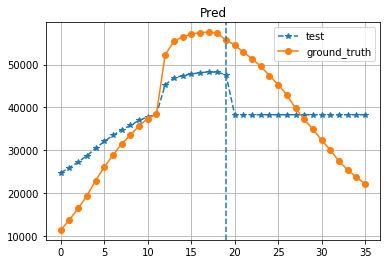

In [28]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/test'
exp_name = 'ori-stnn_05-03-17-08-35_0971'
exp_dir = {'test': exp_name}
# lambd=0 starttime=12
# exp_name = 'v2-stnn_05-03-00-05-59_0251'
# exp = Exp(exp_name, path)
# print(exp.plot_train_times().shape)
result.plot_pred_by_dir(exp_dir, path, train=True)

4171.937210690549


({'test': array([54817.85406494, 56363.48907471, 57055.14196777, 57418.0569458 ,
         57720.628479  , 57891.47802734, 57706.72277832, 57256.98724365,
         42293.08349609, 49502.12536621, 50723.93286133, 50945.11621094,
         50989.82495117, 51000.32275391, 51003.20410156, 51004.09741211,
         51004.3984375 , 51004.50341797, 51004.54125977, 51004.55505371,
         51004.56054688, 51004.56237793, 51004.56347656, 51004.56335449])},
 array([52246., 55422., 56466., 57107., 57478., 57544., 57254., 55753.,
        54557., 52885., 51330., 49580., 47373., 45307., 42874., 39768.,
        37155., 34847., 32327., 30007., 27349., 25364., 23644., 22109.]))

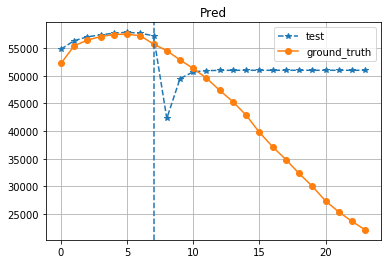

In [2]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/test'
exp_name = 'ori-stnn_05-03-17-11-40_0027'
exp_dir = {'test': exp_name}
# lambd=0 starttime=12
# exp_name = 'v2-stnn_05-03-00-05-59_0251'
# exp = Exp(exp_name, path)
# print(exp.plot_train_times().shape)
result.plot_pred_by_dir(exp_dir, path, train=True)

In [59]:
exp = result.Exp(exp_name, path)
# model = exp.model()
# model.factors.size()
_, z = exp.generate(5)
z.sum()

TypeError: super(type, obj): obj must be an instance or subtype of type

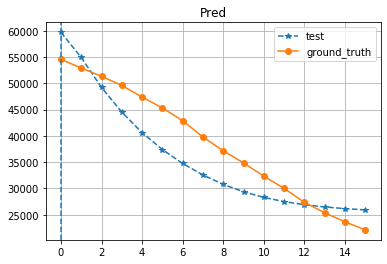

In [19]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/test'
exp_name = 'ori-stnn_05-03-18-56-30_7557'
exp_dir = {'test': exp_name}
# exp_name = 'v2-stnn_05-03-00-05-59_0251'
# exp = Exp(exp_name, path)
# print(exp.plot_train_times().shape)
pred, test = result.plot_pred_by_dir(exp_dir, path, train=False)

In [6]:
# rmse_np(pred['test'], test)
exp = result.Exp(exp_name, path)
exp.pred_loss(reduce=True)

1254.5770141828382

In [18]:
pred_dir, data = result.get_pred(exp_dir, path)
test_data = data[20:]
pred = pred_dir['test']
rmse_np(test_data, pred)

15979.356138261797

In [19]:
exp.pred_loss()

AttributeError: 'Exp' object has no attribute 'pred_loss'

10.732740129743304
996
2760
6525.772123981011
6536.706295986763


({'test': array([ 747.33743286, 1034.87817383, 1825.13184357, 1942.09788513,
         4547.69098663, 4695.8911972 , 9607.97636414, 8847.10440063,
         2244.0158844 , 2968.16540527, 3638.26506805, 3793.23653412,
         3805.0734024 , 3797.13998413, 3793.10730743])},
 array([  814.,  1282.,  1895.,  2608.,  4329.,  5646.,  7309.,  9346.,
        11346., 13711., 16399., 19320., 22859., 26079., 28793.]))

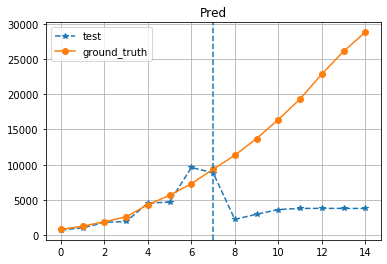

In [26]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/jar'
exp_name = 'v1-stnn_05-05-22-22-31_2973'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
print(exp.config['mintest'])
print(exp.config['minepoch'])
print(exp.config['manualSeed'])
print(exp.pred_loss())
result.plot_pred_by_dir(exp_dir, path, train=True)

0.29393369810921804
14
2017
5611.787056234582


({'test': array([14018.09002686, 15377.3494873 , 12173.60638428, 11737.23114014,
         22695.98864746, 28268.82128906, 24345.91094971, 24781.48742676,
         26903.2734375 , 26758.49212646, 30822.38946533, 43181.72247314,
         53145.63763428, 51922.54602051, 50484.4574585 , 51722.87475586,
         52765.42901611, 52475.86700439, 52106.85931396, 49474.94854736,
         51155.27716064, 46031.8850708 , 56426.22674561, 56176.29473877,
         48040.31451416, 50189.91217041, 50896.62200928, 42723.68109131,
         37138.31604004, 14049.79077148, 17841.75738525, 22069.99859619,
         25124.68170166, 27378.55682373, 28244.14776611, 29015.70782471])},
 array([11346., 13711., 16399., 19320., 22859., 26079., 28793., 31492.,
        33478., 35703., 37347., 38473., 52246., 55422., 56466., 57107.,
        57478., 57544., 57254., 55753., 54557., 52885., 51330., 49580.,
        47373., 45307., 42874., 39768., 37155., 34847., 32327., 30007.,
        27349., 25364., 23644., 22109.]))

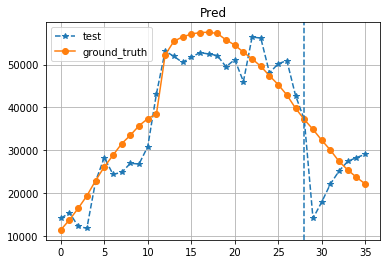

In [4]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/feb'
exp_name = 'v1-stnn_05-05-21-31-56_2895'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
print(exp.config['mintest'])
print(exp.config['minepoch'])
print(exp.config['manualSeed'])
result.plot_pred_by_dir(exp_dir, path, train=True)

mintest:0.030515394040516446
minepoch:4267
manualSeed:6430
1545.3148047304971


({'test': array([35812.28912354, 29690.61572266, 28498.97894287, 28583.46658325,
         22940.01036072, 24597.00856018, 25444.38562012, 21971.36224365,
         15391.92544556, 22349.70288086, 17707.25794983, 10500.66903687,
         16448.70321655, 12772.05148315,  6974.1159668 ,  9721.42266846,
          9684.86961365,  8318.19444275,  6405.57112122,  4435.8788147 ,
          6973.0967865 ,  6658.16145325,  6142.57542419,  3171.24197388,
          3463.76309204,  2927.40710449,  3607.80662537,  2612.16741943,
          2436.34213257,  2303.63775635,  2187.68621826,  2082.16088867,
          1983.4395752 ,  1888.68780518])},
 array([34847., 32327., 30007., 27349., 25364., 23644., 22109., 20528.,
        18887., 17748., 16156., 14809., 14762., 12088., 10722.,  9837.,
         8958.,  8052.,  7256.,  6559.,  6010.,  5546.,  5137.,  4740.,
         4285.,  3953.,  3459.,  3133.,  2690.,  2390.,  2158.,  2001.,
         1863.,  1724.]))

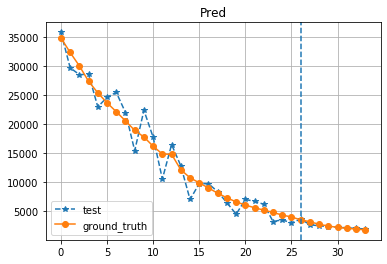

In [8]:
path = 'D:/Jupyter_Documents/ML-code/research_code/output/mar'
exp_name = 'v3-stnn_05-06-00-05-54_5028'
exp_dir = {'test': exp_name}
exp = result.Exp(exp_name, path)
print('mintest: ', exp.config['mintest'])
print('minepoch: ', exp.config['minepoch'])
print('manualSeed: ', exp.config['manualSeed'])
result.plot_pred_by_dir(exp_dir, path, train=True)